In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
# 통계량 계산이나 기본적인 데이터분석을 위한 패키지
import scipy as sp
import scipy.stats

#시각화 패키지
import matplotlib.pyplot as plt

#시각화에서 한글을 사용하기 위한 설정
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

#시각화에서 음수를 표현하기 위한 설정
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False 

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한 
%precision 3

# precision은 소수점은 과학적 표기법으로 변환할 자릿수를 설정
# 아래와 같이 하면 소수점 셋째 자리 밑으로는 과학적 표기법으로 표시
pd.options.display.precision = 3

# 경고창 지우기
import warnings
warnings.filterwarnings('ignore')

## 균일분포

### 마을에 다니는 버스의 주기가 1시간인 경우

In [ ]:
# 균일 분포이고 scale은 60

#### 버스 시간표를 모르고 나갔을 때 버스 정류장에서 대기 시간이 7분 이내일 확률은?

In [3]:
result = sp.stats.uniform.cdf(scale = 60, x =7)
print(result)

0.11666666666666667


#### 버스 시간표를 모르고 나갔을 때 버스 정류장에서 대기 시간이 5~20분 사이일 확률은?

In [19]:
result_1 = sp.stats.uniform.cdf(scale = 60, x = 20)
result_2 = sp.stats.uniform.cdf(scale = 60, x = 5)

print(result_1 - result_2)

result_3 = sp.stats.uniform.cdf(scale = 60, x = [20, 5]) # list
result_4 = sp.stats.uniform.cdf(scale = 60, x = np.array([20, 5])) # ndarray
result_5 = sp.stats.uniform.cdf(scale = 60, x = pd.Series([20, 5])) # Series

print(result_3)
print(result_4)
print(result_5)

print(result_3[0] - result_3[1])

0.25
[0.333 0.083]
[0.333 0.083]
[0.333 0.083]
0.25


#### 버스 시간표를 모르고 나갔을 때 버스 정류장에서 대기 시간이 50분 이상일 확률은?

In [7]:
# cdf
result = sp.stats.uniform.cdf(scale = 60, x = 50)
print(1-result)

#sf
result = sp.stats.uniform.sf(scale = 60, x = 50)
print(result)

0.16666666666666663
0.16666666666666663


#### 버스 시간표를 모르고 나갔을 때 대기 시간이 m분 이내일 확률이 73%가 되는 지점은?

In [9]:
result = sp.stats.uniform.ppf(scale = 60, q = 0.73)
print(result)

43.8


In [11]:
help(sp.stats.uniform.cdf)

Help on method cdf in module scipy.stats._distn_infrastructure:

cdf(x, *args, **kwds) method of scipy.stats._continuous_distns.uniform_gen instance
    Cumulative distribution function of the given RV.
    
    Parameters
    ----------
    x : array_like
        quantiles
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    cdf : ndarray
        Cumulative distribution function evaluated at `x`



### 표준 정규 분포 시각화

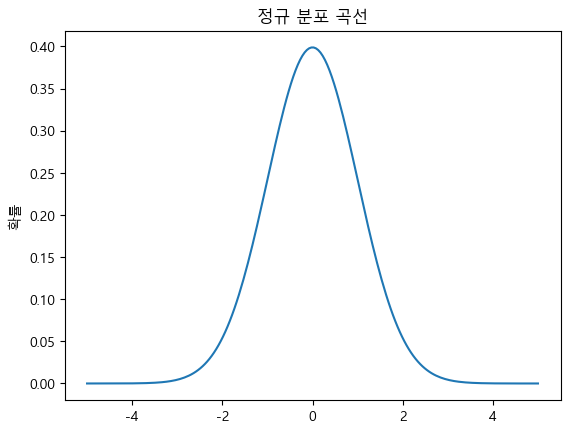

In [23]:
mu, std = 0, 1 

# 평균이 0이고 표준 편차가 1인 정규 분포 객체 생성
rv = sp.stats.norm(mu , std)

# 시각화 할 구간 설정
xx = np.linspace(-5, 5, 200)
plt.plot(xx, rv.pdf(xx))

# 축 설정
plt.ylabel('확률')
plt.title('정규 분포 곡선')

plt.show()

### 붓꽃 데이터의 꽃잎 길이에 대한 시각화

In [24]:
from sklearn.datasets import load_iris
#load_iris 는 붓꽃에 대한 정보를 담은 데이터로 4개의 feature와 3개의 붓꽃 종류라 타겟

setosa_sepal_length  = load_iris().data[:50 , 2]
print(setosa_sepal_length)

[1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 1.5 1.6 1.4 1.1 1.2 1.5 1.3 1.4
 1.7 1.5 1.7 1.5 1.  1.7 1.9 1.6 1.6 1.5 1.4 1.6 1.6 1.5 1.5 1.4 1.5 1.2
 1.3 1.4 1.3 1.5 1.3 1.3 1.3 1.6 1.9 1.4 1.6 1.4 1.5 1.4]


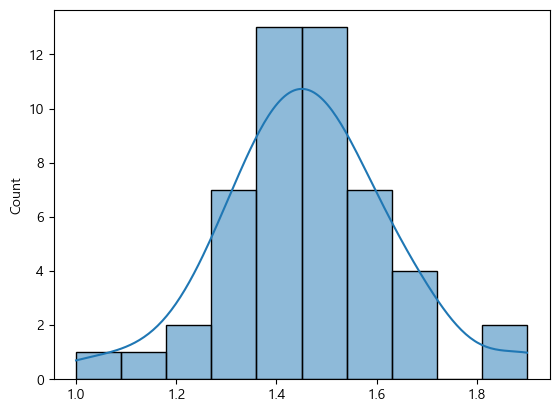

In [25]:
#kde를 설정하면 분포곡선을 그려줍니다.
import seaborn as sns
sns.histplot(setosa_sepal_length, kde = True)
plt.show()

### finance-dataredaer 패키지

In [27]:
!pip install finance-datareader

  Obtaining dependency information for finance-datareader from https://files.pythonhosted.org/packages/24/1e/abc90ffca25f1b8602dbd425b8be10a7a402c3a90ed902b62bffca7e4fa5/finance_datareader-0.9.70-py3-none-any.whl.metadata


In [28]:
# 한국 거래소 상장 종목 전체 가져오기
import FinanceDataReader as fdr

df_kfx = fdr.StockListing('KRX')
df_kfx.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,73100,3,0,0.00,73600,74200,73100,8452965,621459111500,436391104405000,5969782550,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,161000,1,4500,2.88,166900,166900,160400,3482672,572431961500,117208380765000,728002365,STK
2,373220,KR7373220003,LG에너지솔루션,KOSPI,,408000,2,-500,-0.12,411500,411500,405500,43177,17636727500,95472000000000,234000000,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,812000,2,-8000,-0.98,819000,828000,812000,19972,16346003000,57793288000000,71174000,STK
4,005935,KR7005931001,삼성전자우,KOSPI,,63300,1,100,0.16,63500,63500,62800,500692,31660688100,52088728110000,822886700,STK


In [30]:
# 코스피 지수 가져오기
kospi = fdr.DataReader('KS11', '2024-01-01') # KS11 : 한국
print(kospi.head())


               Open     High      Low    Close     Volume  Change  UpDown  \
Date                                                                        
2024-01-02  2645.47  2675.80  2641.88  2669.81  409871688   0.006       1   
2024-01-03  2643.54  2643.72  2607.31  2607.31  463131608  -0.023       2   
2024-01-04  2592.44  2602.64  2580.09  2587.02  770176172  -0.008       2   
2024-01-05  2586.89  2592.29  2572.60  2578.08  522289892  -0.003       2   
2024-01-08  2584.23  2591.68  2566.34  2567.82  320143990  -0.004       2   

             Comp          Amount            MarCap  
Date                                                 
2024-01-02  14.53   9628190129018  2147223894556881  
2024-01-03 -62.50  10121578328315  2096573473823721  
2024-01-04 -20.29   8992273956601  2081862659594752  
2024-01-05  -8.94   8384472928787  2075148802709824  
2024-01-08 -10.26   6763632029996  2067290656237408  


In [32]:
# 특정 기업의 주가를 가져오기 : 종목 정보를 알면 된다.
df = fdr.DataReader('005380', '2024-01-01') # 005380 : 현대 자동차
print(df.head())

df1 = fdr.DataReader('005930', '2024-01-01')
print(df.tail())

              Open    High     Low   Close  Volume  Change
Date                                                      
2024-01-02  202000  202500  199800  200500  373050  -0.015
2024-01-03  199100  199500  193800  193800  548675  -0.033
2024-01-04  192000  192800  189100  190000  505979  -0.020
2024-01-05  190100  190500  187200  187300  440219  -0.014
2024-01-08  187600  188900  185500  185700  323498  -0.009
              Open    High     Low   Close   Volume  Change
Date                                                       
2024-02-19  253500  257000  248500  252500  1801441   0.000
2024-02-20  250000  253000  238500  242000  1944653  -0.042
2024-02-21  242000  246000  237500  239500  1149137  -0.010
2024-02-22  239000  245500  237500  243500  1475580   0.017
2024-02-23  244000  246500  242500  244500   416302   0.004


### 나스닥 지수의 일자별 차이를 확인

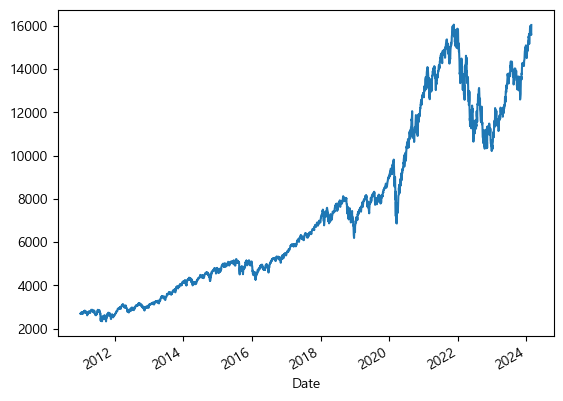

In [35]:
# 2024-01-01부터 나스닥 주가 지수를 가져오기
data = pd.DataFrame()
data['IXIC'] = fdr.DataReader('IXIC', '2011-01-01')['Close']

# 결측치 제거
data = data.dropna()

# 시각화 - 시간이 지나면서 증가
data.plot(legend = False)
plt.show()

In [37]:
# 일자별 차이를 구하기
daily_returns = data.pct_change().dropna()
print(daily_returns.head())

# 평균과 표편 구하기
mean = daily_returns.mean().values[0]
std = daily_returns.std().values[0]

print('일간 차이 평균 : ', mean)
print('일간 변동성 :', std)

             IXIC
Date             
2011-01-04 -0.004
2011-01-05  0.008
2011-01-06  0.003
2011-01-07 -0.002
2011-01-10  0.002
일간 차이 평균 :  0.0006232836327747786
일간 변동성 : 0.012862577486200804


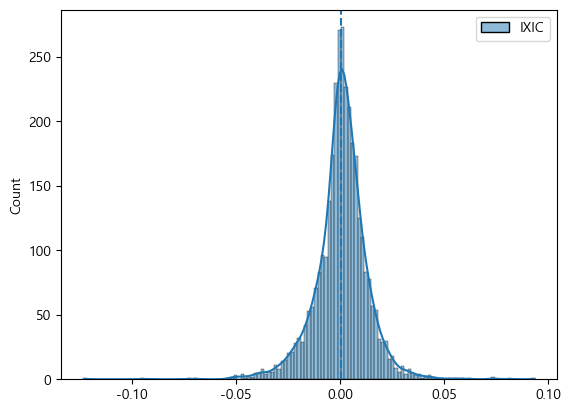

In [39]:
# 일자별 차이 시각화
sns.histplot(daily_returns, kde = True)
ymin, ymax = plt.ylim()
# 가운데 (0) 위치에 선 긋기
plt.vlines(x = mean, ymin = 0, ymax = ymax , ls = "--")
plt.ylim(0, ymax)
plt.show()

### 정규 분포를 따르고 평균키가 174cm , 표편 7일때

#### 키가 170cm 이하일 확률

In [ ]:
rv = sp.stats.norm.cdf()

#### 상위 30%인 키

### 로그 정규 분포와 일반 정규 분포의 확률 모형 시각화

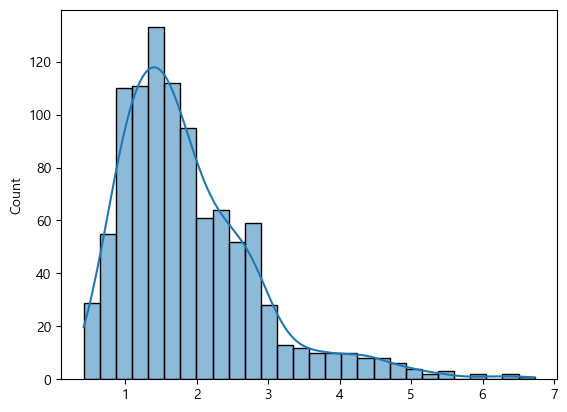

In [42]:
# 평균이 1, 정규 분포
mu = 1
rv = sp.stats.norm(loc = mu)
x1 = rv.rvs(1000)

# 정규분포 데이터를 이용한 로그 정규 분포 데이터 생성
# 시작하는 부분에 데이터가 치우침
# 타겟 데이터가 한쪽으로 몰려있는 경우 로그 변환을 고려
s = 0.5
x2 = np.exp(s * x1)

# sns.histplot(x1, kde = True)
sns.histplot(x2, kde = True)

plt.show()

### Q-Q Plot

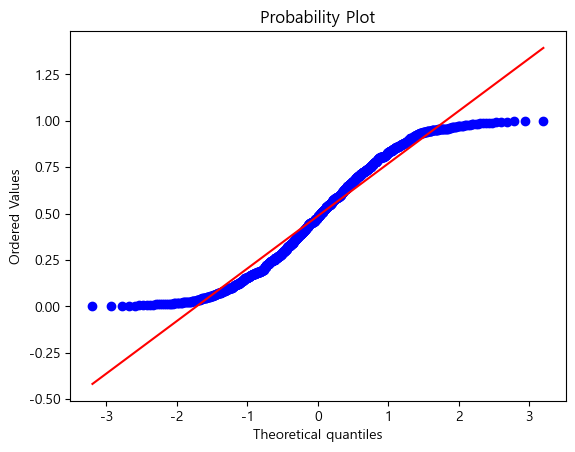

In [43]:
#랜덤하게 데이터 추출
x = np.random.rand(1000)

#Q-Q plot을 그려주는 함수
# 직선에 비해서 휘어져 있다! => 정규를 따르지 않는다.
sp.stats.probplot(x, plot = plt)
plt.show()

### 중심극한 정리

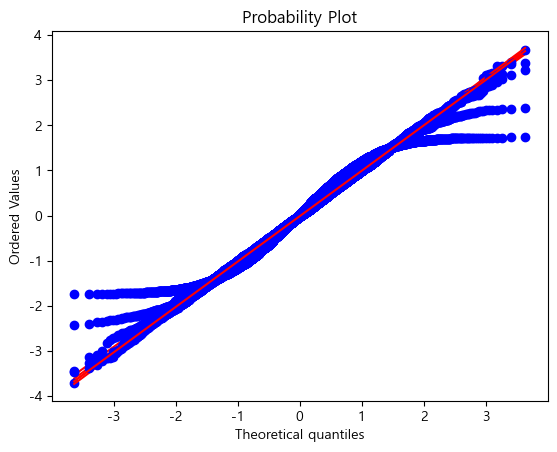

In [44]:
# 여러개의 표본에서 추출한 데이터를 합치면 정규 분포 와 유사해진다.
xx = np.linspace(-2, 2, 100)

for i, N in enumerate([1, 2, 5, 10, 20]) :
    X = np.random.rand(5000, N)
    
    Xbar = (X.mean(axis = 1)-0.5) * np.sqrt(12 * N)
    sp.stats.probplot(Xbar, plot=plt)
    
plt.show()

### t 분포

### 각국의 주식 시장에서 주가의 분포

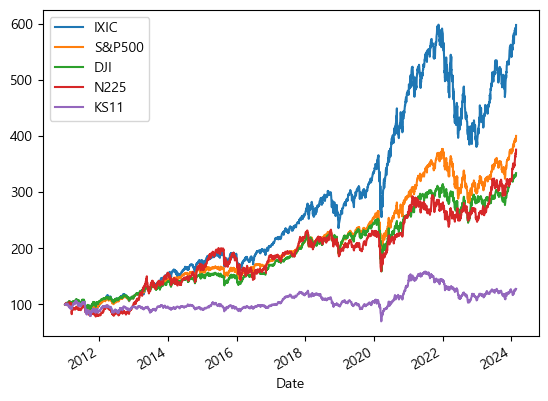

In [47]:
symbols = ['S&P500', 'IXIC', 'DJI','N225', "KS11"]

# 주가 가져오기
df = pd.DataFrame()
for sym in symbols :
    data[sym] = fdr.DataReader (sym, '2011-01-01')['Close']
    
data = data.dropna()
# print(data.tail())
(data/data.iloc[0] * 100).plot()
plt.show()

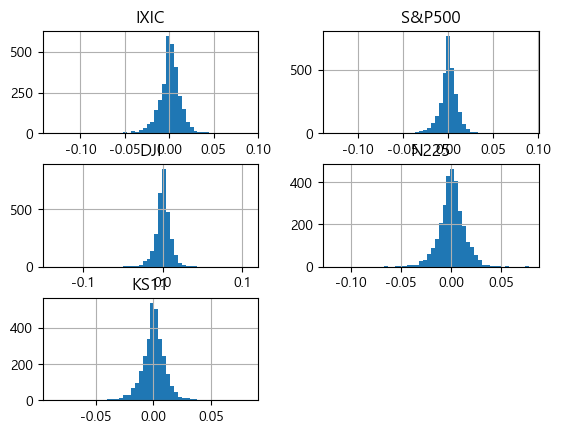

In [48]:
# 수익률
log_returns = np.log(data/ data.shift(1))
log_returns.hist(bins = 50)
plt.show()

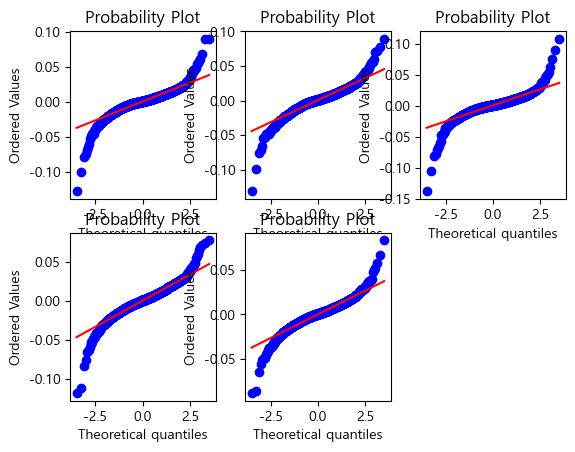

In [49]:
# Q-Q plot
# enumerate 함수는 iterable 객체를 받아서 순회를 하는데
# (인덱스, 데이터)로 리턴해주는함수
for i, sym in enumerate(symbols) :
    ax = plt.subplot(2, 3, i+1)
    sp.stats.probplot(log_returns[sym].dropna(), plot = ax)
    
plt.show()
    

### 기온 데이터를 측정했을 때 25도 는 상위 몇 %에 해당하는지 알고 자 하는 경우

In [54]:
data = np.array([23, 30, 18, 33, 28, 33, 34, 38, 29, 31])

# t 클래스의 인스턴스를 만들기 위해서 표본 평균, 표본 표준편차, 자유도를 계산
d_mean = data.mean()
# 모집단의 표준편차가 아니고 샘플 데이터의 표준 편차이므로 평균을 가정해야함
#ddof 에 1개의 값을 가정해야하므로 1을 설정
d_std = data.std(ddof = 1)

#자유도
df = len(data) -1

p = sp.stats.t.cdf(x = 25, loc = d_mean, scale = d_std, df =df)
print((1-p)*100, '%')

p = sp.stats.t.sf(x = 25, loc = d_mean, scale = d_std, df =df)
print(p * 100, '%')

78.31419611342892 %
78.31419611342892 %


### 푸아송 분포

#### 단위 시간당 10개의 사건이 발생하는 경우의 분포 시각화

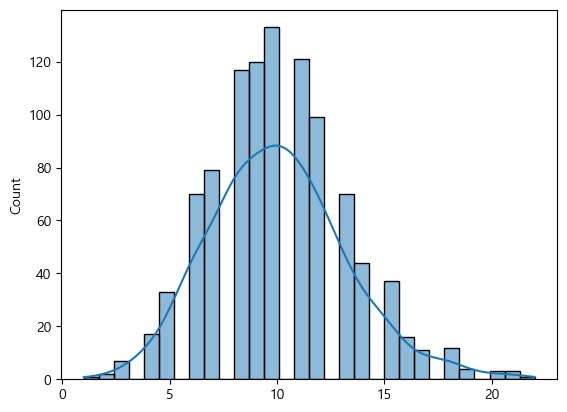

In [56]:
data_poisson = sp.stats.poisson.rvs(mu =10, size = 1000)
sns.histplot(data_poisson, bins = 30, kde = True)
plt.show()

#### 2022년 기준으로 한 시간 평균 신생아 수는 682 명인 경우에 한 시간에 650명 이하의 신생아를 낳을 확률은?

In [57]:
p = sp.stats.poisson.cdf(mu = 682, k =650)
print(p)

0.11328673711427531


#### 시간당 500M 정도의 트래픽을 소모하는데 99%정도를 처리하고자 할 때 필요한 트래픽은?

In [62]:
p = sp.stats.poisson.ppf(mu = 500, q = 0.99)
print(p)

553.0


### 지수 분포

#### 스마트폰 배터리가 20시간 이내에 소진할 확률은?

In [64]:
p = sp.stats.expon.cdf(scale = 24, x = 20)
print(p)

0.5654017914929218


#### 스마트폰 배터리가 12시간 에서 30시간 이내에 소진할 확률은?

In [65]:
p = sp.stats.expon.cdf(scale = 24, x = [30, 12])
print(p)
print(p[0] - p[1])

[0.713 0.393]
0.3200258628524433


#### 소진할 확률이 85%가 되는 지점은?

In [66]:
p = sp.stats.expon.ppf(scale = 24, q = 0.85)
print(p)

45.530879637261144


### 복원 추출과 비복원 추출

In [70]:
import random

li = ['방탄', '엑소', '세븐틴', '신화', '비스트', '인피니트']

# 복원 추출 
for i in range(5) :
    print(li[random.randint(0, len(li)-1)], end = '\t')
    
print()
# 비복원 추출
print(random.sample(li, k=5))

세븐틴	신화	비스트	인피니트	세븐틴	
['인피니트', '엑소', '비스트', '신화', '방탄']


### 가중치를 적용한 표본 추출

In [153]:
ar = ['가영', '주원', '현숙' ,'영서', '민형', '희진']

print(np.random.choice(ar, 10, p = [0, 0, 0, 0, 0, 1]))
# help(np.random.choice)

['희진' '희진' '희진' '희진' '희진' '희진' '희진' '희진' '희진' '희진']


In [72]:
help(pd.DataFrame.sample)

Help on function sample in module pandas.core.generic:

sample(self: 'NDFrameT', n: 'int | None' = None, frac: 'float | None' = None, replace: 'bool_t' = False, weights=None, random_state: 'RandomState | None' = None, axis: 'Axis | None' = None, ignore_index: 'bool_t' = False) -> 'NDFrameT'
    Return a random sample of items from an axis of object.
    
    You can use `random_state` for reproducibility.
    
    Parameters
    ----------
    n : int, optional
        Number of items from axis to return. Cannot be used with `frac`.
        Default = 1 if `frac` = None.
    frac : float, optional
        Fraction of axis items to return. Cannot be used with `n`.
    replace : bool, default False
        Allow or disallow sampling of the same row more than once.
    weights : str or ndarray-like, optional
        Default 'None' results in equal probability weighting.
        If passed a Series, will align with target object on index. Index
        values in weights not found in sampled 

### pandas 의 샘플링 API

In [101]:
ex_df = pd.DataFrame(np.arange(0, 12). reshape(4,3))
print(ex_df)
print()

# 2개의 행을 추출
print(ex_df.sample(n=2))
print()

#1개의 열을 랜덤하게 추출
print(ex_df.sample(n=1, axis =1))
print()

   0   1   2
0  0   1   2
1  3   4   5
2  6   7   8
3  9  10  11

   0  1  2
0  0  1  2
1  3  4  5

    2
0   2
1   5
2   8
3  11



### sklearn 을 이용한 데이터 분할

In [102]:
# 데이터 생성
# 특별한 경우가 아니면 피처는 대문자 X로 나타냅니다.
# 타겟은 소문자 y로 나타냅니다.
# numpy 의 1차원 ndarray는 출력을 하면 옆으로 펼쳐지지만 하나의 열로 간주합니다.

X = np.arange(20).reshape(10, 2)
print(X)

y = np.arange(10) # 열방량 기준이 디폴트
print(y)

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]]
[0 1 2 3 4 5 6 7 8 9]


In [106]:
# 순차적 분할 - 7:3
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle= False, random_state = 42)
print('X_train shape ;', X_train.shape)
print('X_test shape ;', X_test.shape)
print('y_train shape ;', y_train.shape)
print('y_test shape ;', y_test.shape)
print()

print(X_train)

X_train shape ; (7, 2)
X_test shape ; (3, 2)
y_train shape ; (7,)
y_test shape ; (3,)

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]]


In [111]:
# 무작위 추출 : 랜덤하게 추출하는 것인데 이 경우는 shu

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X_train)
print()
print(y_train)

[[ 0  1]
 [14 15]
 [ 4  5]
 [18 19]
 [ 8  9]
 [ 6  7]
 [12 13]]

[0 7 2 9 4 3 6]


### 층화 무작위 추출

In [155]:
#  층화 추출
X = np.arange(30).reshape(15,2)
y = np.arange(15)
grep = [0, 0, 0, 0, 0, 1, 1, 1, 1 ,1 , 1, 1, 1, 1, 1]

# 단순한 방식으로 추출을 하게 되면 한 쪽으로 샘플이 쏠리는 현상이 발생하고
# 이렇게 되면 샘플 데이터에서는 잘 맞지만 실제 서비스 환경에서는 제대로 맞추지
# 못하는 Overfitting 현상이 발생할 수 있습니다.

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2,
                                                   shuffle = True,
                                                   random_state = 1004)

print(y_train)
print(y_test)

[ 9  0  6 12 14  1  4  7  3  5 11  2]
[ 8 10 13]


In [271]:
#  층화 추출
X = np.arange(30).reshape(15,2)
y = np.arange(15)
grep = [0, 0, 0, 0, 0, 1, 1, 1, 1 ,1 , 1, 1, 1, 1, 1]

# stratify 에 대입한 리스트의 비율으 확인해서 샘플링
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2,
                                                   shuffle = True,
                                                   stratify = grep)

print(y_train)
print(y_test)

[ 0  3 13 10  8  7  1 11  9  6  2 14]
[ 4  5 12]


In [273]:
# 교차 검증을 위해서 데이터를 n등분 후 층화추출 해주는 API
# 직접사용하지 않고 머신 러닝 모델이 내부적으로 사용
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 1004)

for train_idx, test_idx in split.split(X, grep) :
    X_train = X[train_idx]
    X_test = X[test_idx]
    
    y_train = y[train_idx]
    y_test = y[test_idx]
    
print(y_train)
print(y_test)

[ 6  4 14  0  5  3  1  9 10 11 13  7]
[ 8  2 12]
